In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### High level stat
* <font size=4> Total 1.29M transaction records available. Only 7506 fradulent transaction records are available. Data is **highly imbalanced** </font>
* <font size=4> **No missing values** </font> 

In [6]:
data = pd.read_csv('data_raw.csv',index_col=0)
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
data.shape

(1296675, 22)

In [9]:
data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
data[data.isna()].count()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Categorical Variables
* <font size=4>Three categorical variables 'firstname', 'lastname' and 'transaction num' are dropped from this analysis</font>
* <font size=4>Percentage of fradulent transactions have been analysed for different features. ***There are some 'city', 'street', 'zipcode' and 'job' for which 100% transactions done are fradulent*** </font>
* <font size=4>The feature 'state' has also been dropped as information of city and street are already available</font>
* <font size=4>There is nothing significant in 'gender'. ***Number of fradulent transactions are almost equal for male and female account holders***</font>


In [13]:
data['zip'] = data['zip'].astype(object)
data['zip'].dtype

dtype('O')

In [14]:
cat_features = list()
for feature in data.columns:
    if data[feature].dtype == "object":
        cat_features.append(feature)
cat_features

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'job',
 'dob',
 'trans_num']

In [15]:
## These features are not required
cat_features.remove('first')
cat_features.remove('last')
cat_features.remove('trans_num')
cat_features

['trans_date_trans_time',
 'merchant',
 'category',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'job',
 'dob']

In [16]:
for f in ['merchant','street', 'category','city', 'job', 'zip']:
    total_categories = len(data[f].unique())
    fraud_counts = data[data['is_fraud']==1][f].value_counts()
    fradulent_cat = list(fraud_counts.index)
    transaction_counts = data[data[f].isin(fradulent_cat)][f].value_counts()
    fraud_percent = (fraud_counts/transaction_counts)*100
    fraud_percent.sort_values(ascending=False, inplace=True)
    print(f"Feature - {f}:\n There are {total_categories} unique categories\n")
    print(f"Top 10 categories and percentage of fraud: {fraud_percent[0:10]}")
    print("\n")

Feature - merchant:
 There are 693 unique categories

Top 10 categories and percentage of fraud: merchant
fraud_Kozey-Boehm                       2.572347
fraud_Herman, Treutel and Dickens       2.538462
fraud_Kerluke-Abshire                   2.230686
fraud_Brown PLC                         2.210884
fraud_Goyette Inc                       2.161606
fraud_Terry-Huel                        2.154309
fraud_Jast Ltd                          2.150538
fraud_Schmeler, Bashirian and Price     2.083333
fraud_Boyer-Reichert                    1.991614
fraud_Langworth, Boehm and Gulgowski    1.980701
Name: count, dtype: float64


Feature - street:
 There are 983 unique categories

Top 10 categories and percentage of fraud: street
48635 Paul Hills                 100.0
5560 Arnold Port Suite 880       100.0
8498 Lisa Stream                 100.0
64965 Morris Hollow Suite 323    100.0
644 Deborah Courts               100.0
621 Reilly Road Apt. 756         100.0
8611 Tricia Fork                 100.0

In [17]:
print(data[['is_fraud','gender' ]].value_counts())
# sns.countplot(data, x='gender', hue='is_fraud')

is_fraud  gender
0         F         706128
          M         583041
1         M           3771
          F           3735
Name: count, dtype: int64


### Date Time Feature
* <font size=4>'Hour' is extracted from transaction time. ***A large percentage of fradulent transactions took place between 22:00 to 23:59 followed by 00:00 to 04:00 hrs. So midnight is the most vulnerable time*** </font>
* <font size=4>'Age' is derived from 'DOB' and 'Transaction Time' features. ***Percentage of fradulent transactions are less than 1% across all age groups***</font>


In [19]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])
data[['trans_date_trans_time', 'dob']].dtypes

trans_date_trans_time    datetime64[ns]
dob                      datetime64[ns]
dtype: object

In [20]:
data_1 = data.copy()

In [21]:
# extract only hour of day from transaction time and age of person from datetime
data_1['hour'] = data_1['trans_date_trans_time'].dt.hour
data_1['age'] = (data_1['trans_date_trans_time']- data_1['dob']).dt.days/365

In [22]:
data_1[['hour', 'age']].tail(5)

,hour,age
1296670,12,58.613699
1296671,12,40.556164
1296672,12,52.846575
1296673,12,39.868493
1296674,12,24.865753


In [23]:
data_1[data['is_fraud']==1]['hour'].value_counts()

hour
22    1931
23    1904
1      658
0      635
2      625
3      609
14      86
18      81
19      81
13      80
15      79
17      78
16      76
21      74
12      67
20      62
5       60
7       56
8       49
9       47
4       46
11      42
10      40
6       40
Name: count, dtype: int64

<Axes: xlabel='hour', ylabel='count'>

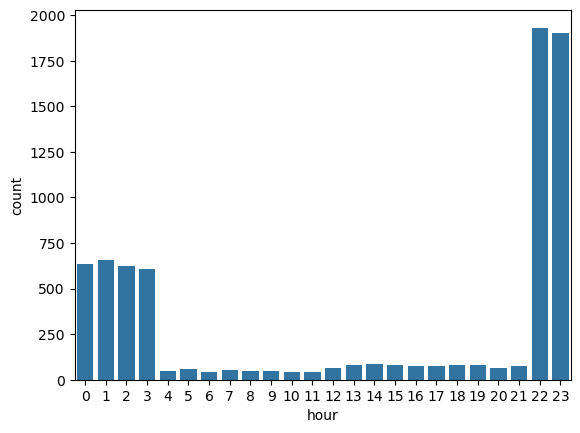

In [24]:
sns.countplot(data_1[data_1['is_fraud']==1], x='hour')

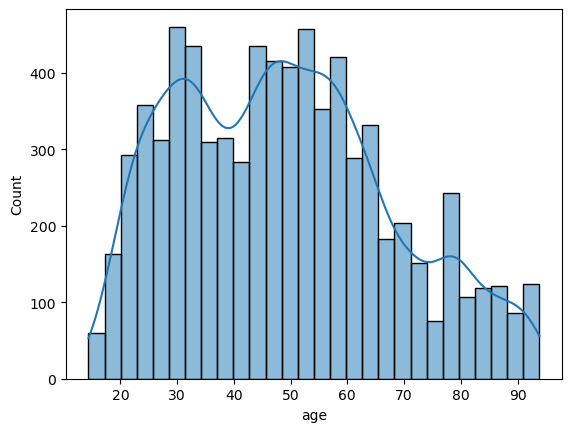

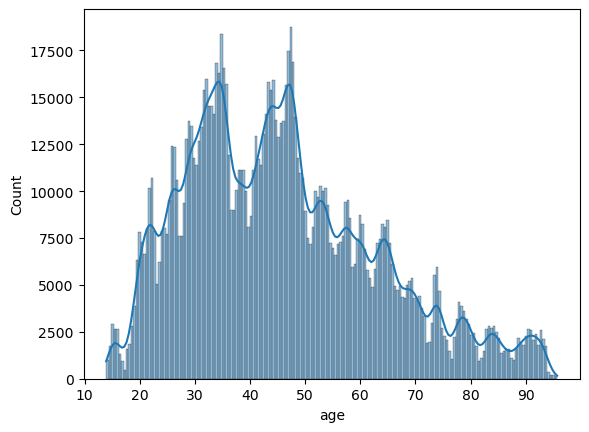

In [25]:
sns.histplot(data_1[data_1['is_fraud']==1], x='age',kde=True)
plt.show()
sns.histplot(data_1[data_1['is_fraud']==0], x='age',kde=True)
plt.show()

In [26]:
def age_encoding(age):
    return int(age//10)
data_1['age_encoded'] = data_1['age'].map(age_encoding)

In [27]:
fraud_counts = data_1[data_1['is_fraud']==1]['age_encoded'].value_counts()
fradulent_cat = list(fraud_counts.index)
transaction_counts = data_1[data_1['age_encoded'].isin(fradulent_cat)]['age_encoded'].value_counts()
fraud_percent = (fraud_counts/transaction_counts)*100
fraud_percent.sort_values(ascending=False, inplace=True)
fraud_percent

age_encoded
8    0.887343
7    0.868839
5    0.750126
9    0.707707
1    0.645553
6    0.618876
2    0.585366
4    0.458599
3    0.437874
Name: count, dtype: float64

### Numerical Features
* <font size=4>Features 'cc_num' is dropped. 'lat', 'long' are dropped as information of city, street and zip are already available. As transaction time data has already been taken care of 'unix time' feature has also been dropped.</font>
* <font size=4>Cities having less population have higher rate of fraud</font>
* <font size=4>Number of fradulent transactions is higher for low amount.</font>
* <font size=4>There is no significant pattern of merchant latitude and longitude with fraud</font>

In [29]:
num_features = list()
for feature in data.columns:
    if data[feature].dtype == 'int64' or data[feature].dtype == 'float64':
        num_features.append(feature)
num_features

['cc_num',
 'amt',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [30]:
num_features.remove('cc_num')
num_features.remove('lat')
num_features.remove('long')
num_features.remove('unix_time')
num_features

['amt', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']

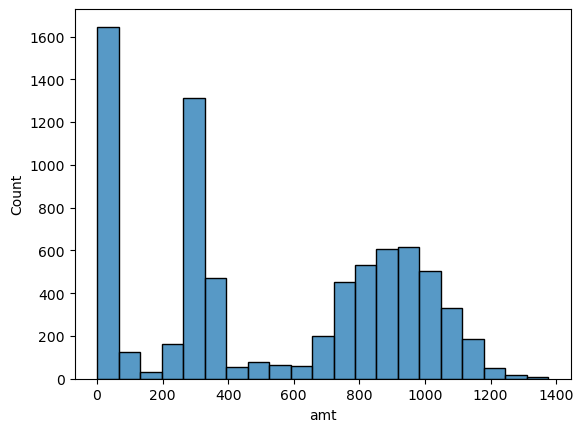

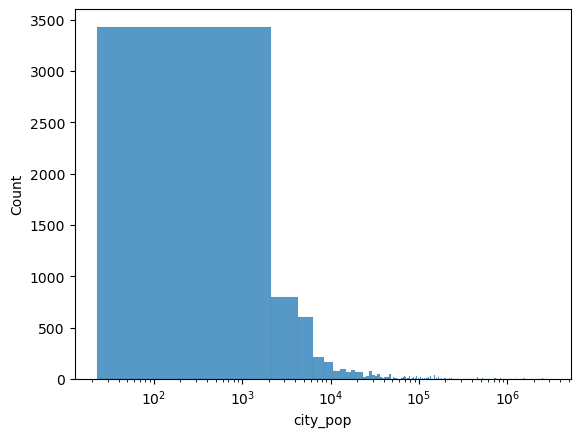

In [79]:
sns.histplot(data[data['is_fraud']==1], x='amt')
plt.show()
sns.histplot(data[data['is_fraud']==1], x='city_pop')
plt.xscale('log')
plt.show()

<Axes: xlabel='merch_long', ylabel='merch_lat'>

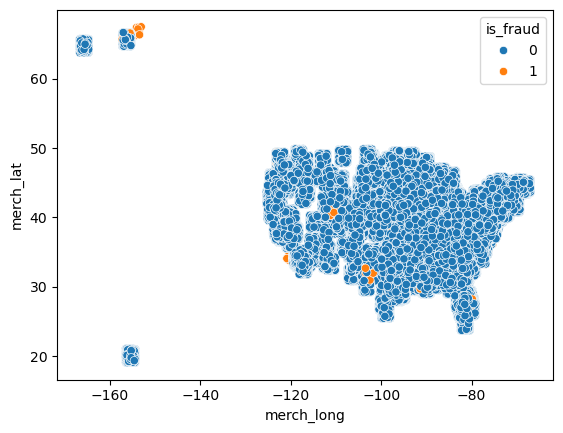

In [83]:
sns.scatterplot(data, x='merch_long', y='merch_lat', hue='is_fraud')

<Axes: xlabel='merch_long', ylabel='merch_lat'>

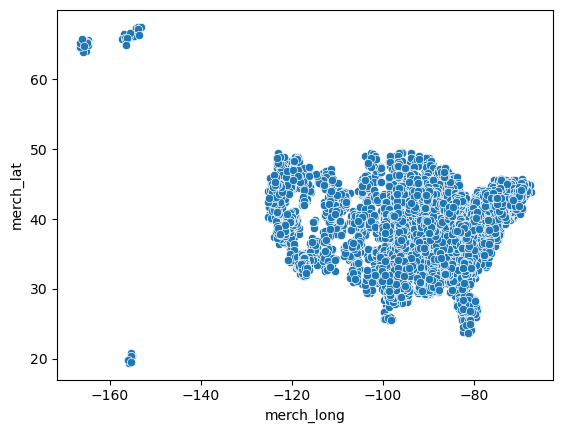

In [85]:
sns.scatterplot(data[data['is_fraud']==1], x='merch_long', y='merch_lat')